In [1]:
# Import Dependencies
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

### Load Dataset

In [2]:
# Load MNIST dataset
# transform= transfoms.ToTensor [Read the mnist data as torch tensors]
train_data = dsets.MNIST(root="./dataset/",
                        train = True,
                        transform = transforms.ToTensor(),
                        download = True)

In [3]:
# Length of Training Dataset
len(train_data)

60000

In [4]:
# First element in list
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
type(train_data[0])

tuple

In [6]:
# Size of one image
train_data[0][0].size()

torch.Size([1, 28, 28])

In [7]:
# Label for one image
train_data[0][1]

tensor(5)

### Visualize Data

In [8]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Convert torch tensor to numpy array
train_data[0][0].numpy().shape

(1, 28, 28)

In [10]:
# Plot image using numpy array
img = train_data[0][0].numpy().reshape(28,28)

In [11]:
# Get True Image Label
label = np.asarray(train_data[0][1].numpy())

In [12]:
print(label)

5


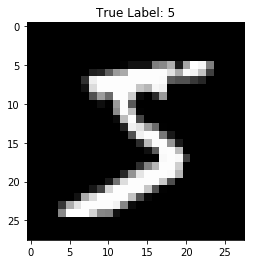

In [13]:
# Plot image
plt.imshow(img, cmap='gray')
plt.title("True Label: " + str(label));

In [14]:
# Load test Data
test_data = dsets.MNIST(root="./dataset/",
                       train = False,
                       transform = transforms.ToTensor())

In [15]:
len(test_data)

10000

In [16]:
type(test_data[0])

tuple

In [17]:
# First image in test dataset
test_data[0][0].size()

torch.Size([1, 28, 28])

In [18]:
# First test image
img = test_data[0][0].numpy().reshape(28,28)

In [19]:
# First test label
label = test_data[0][1].numpy()

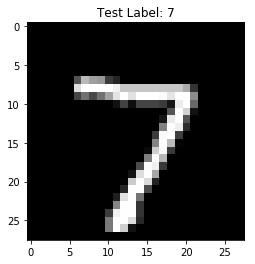

In [20]:
# Plot image
plt.imshow(img, cmap='gray')
plt.title("Test Label: " + str(label));

In [21]:
# Define training parameters

# Batch Size
batch_size = 100

# Num. of Iterations
num_iters = 5000

In [22]:
# Num epochs
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
num_epochs

8

In [23]:
# Create Iterable Training Dataset Loader
train_loader = torch.utils.data.DataLoader(dataset= train_data,
                                          batch_size= batch_size,
                                          shuffle= True)

In [24]:
# Make sure that train_loader is iterable
import collections

isinstance(train_loader, collections.Iterable)

True

In [25]:
# Create Iterable Test Dataset Loader
test_loader = torch.utils.data.DataLoader(dataset= test_data,
                                          batch_size= batch_size,
                                          shuffle= False)

In [26]:
# Make sure that test_loader is iterable
isinstance(test_loader, collections.Iterable)

True

### Build the Model

In [27]:
# Logistic Regression Class
class LogisticRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        # define super to inherit from nn.Module
        super(LogisticRegressionModel, self).__init__()
        # define linear function where input_dim: "x" and output_dim: "y"
        self.linear = nn.Linear(input_dim, output_dim)
    
    # Forward Pass
    # Input: values in "x"
    # Return: estimated value of "y" i.e. "y_hat"
    def forward(self,x):
        out = self.linear(x)
        return out

In [28]:
# Define image Dimensions
input_dim = 28*28

# Output Dimensions: 10 classes
output_dim = 10

# Instantiate the Model
model = LogisticRegressionModel(input_dim=input_dim, output_dim=output_dim)

In [29]:
# Define Loss Criterion
# Computes Softmax and Crossentropy Loss
criteria = nn.CrossEntropyLoss()

In [30]:
# Learning Rate
lr = 0.01

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [31]:
# Model Parameters
model.parameters()

<generator object Module.parameters at 0x11cf82e08>

In [32]:
len(list(model.parameters()))

2

In [33]:
# FC1 Parameters; "alpha"
list(model.parameters())[0].size()

torch.Size([10, 784])

In [34]:
# FC1 Bias: "beta"
list(model.parameters())[1].size()

torch.Size([10])

In [35]:
# Train the Model
iter = 0

for epoch in range(num_epochs):
    # Go through all 60,000 train images
    for i, (image,label) in enumerate(train_loader):
        # Define Training Inputs and Labels
        # Variable has "requires_grad = True" by default
        # images and labels are already torch tensors, no need to define again
        inputs = Variable(image.view(-1,28*28))
        labels = Variable(label)
        
        # Clear gradients w.r.t parameters every epoch to avoid gradient accumulation
        optimizer.zero_grad()
    
        # Execute forward pass to get predicted labels
        y_hat = model(inputs)
        
        # Calculate the loss: Softmax -> Crossentropy Loss
        loss = criteria(y_hat,labels)
        
        # Backpropagate the gradients
        loss.backward()

        # Update the Parameters
        optimizer.step()
        
        iter += 1
        
        if iter%500 == 0:
            # Calculate Accuracy of Model
            correct = 0
            total = 0
            
            # Iterate through test dataset to get accuracy
            for images,labels in test_loader:
                # Load Images
                inputs = Variable(images.view(-1,28*28))
                
                # Get predicted outputs
                y_hat = model(inputs)
                
                # Get predictions from max probb value
                _, predicted = torch.max(y_hat.data,1)
                
                # Total labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            print("Iteration: {0}\t Loss: {1}\t Accuracy: {2}%".format(iter,loss.data[0],accuracy))

/Users/anujdutt/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 500	 Loss: 0.8442320823669434	 Accuracy: 84%
Iteration: 1000	 Loss: 0.6114340424537659	 Accuracy: 86%
Iteration: 1500	 Loss: 0.637068510055542	 Accuracy: 87%
Iteration: 2000	 Loss: 0.46675723791122437	 Accuracy: 88%
Iteration: 2500	 Loss: 0.4421962797641754	 Accuracy: 88%
Iteration: 3000	 Loss: 0.4480551481246948	 Accuracy: 89%
Iteration: 3500	 Loss: 0.445093035697937	 Accuracy: 89%
Iteration: 4000	 Loss: 0.31390073895454407	 Accuracy: 89%
Iteration: 4500	 Loss: 0.44040313363075256	 Accuracy: 89%
